## **IMPORTS**

In [53]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import module.classification_model as classification_model
import module.feature_engineering as feature_engineering
import module.visualization as visualization

from sklearn.metrics import confusion_matrix

import tensorflow as tf

import random

In [54]:
%%capture
%run data_preprocessing.ipynb

Fisso i semi per la riproducibilità dei risultati.

In [55]:
# Fissare i semi per la riproducibilità
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

## **FEATURE ENGINEERING**

In [56]:
ann_X_train, ann_X_test = feature_engineering.standard_scaler(X_train_smote, X_test)

## **MULTILAYER PERCEPTRON**

In [57]:
# Configurazione del modello
mlp_model, mlp_history = classification_model.set_ann(ann_X_train, y_train_smote)

Epoch 1/100


c:\Users\arvin\Documents\Projects\Company_Bankruptcy_Prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6195 - auc: 0.7356 - loss: 0.6482 - precision: 0.4997 - recall: 0.7870 - val_accuracy: 0.8476 - val_auc: 0.0000e+00 - val_loss: 0.4837 - val_precision: 1.0000 - val_recall: 0.8476
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - auc: 0.8785 - loss: 0.4917 - precision: 0.6998 - recall: 0.7846 - val_accuracy: 0.8571 - val_auc: 0.0000e+00 - val_loss: 0.4354 - val_precision: 1.0000 - val_recall: 0.8571
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8149 - auc: 0.8973 - loss: 0.4277 - precision: 0.7388 - recall: 0.7842 - val_accuracy: 0.8571 - val_auc: 0.0000e+00 - val_loss: 0.4069 - val_precision: 1.0000 - val_recall: 0.8571
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - auc: 0.9065 - loss: 0.3960 - precision: 0.7533 - recall: 0.7794 - val_accuracy: 0.8667 - val_auc: 0.0000e+00 - val_loss: 0.3888 - val_precision: 1.0000 - val_recall: 0.8667
Epoch 5/100
14/14 ━━━━━━━━━━━━━

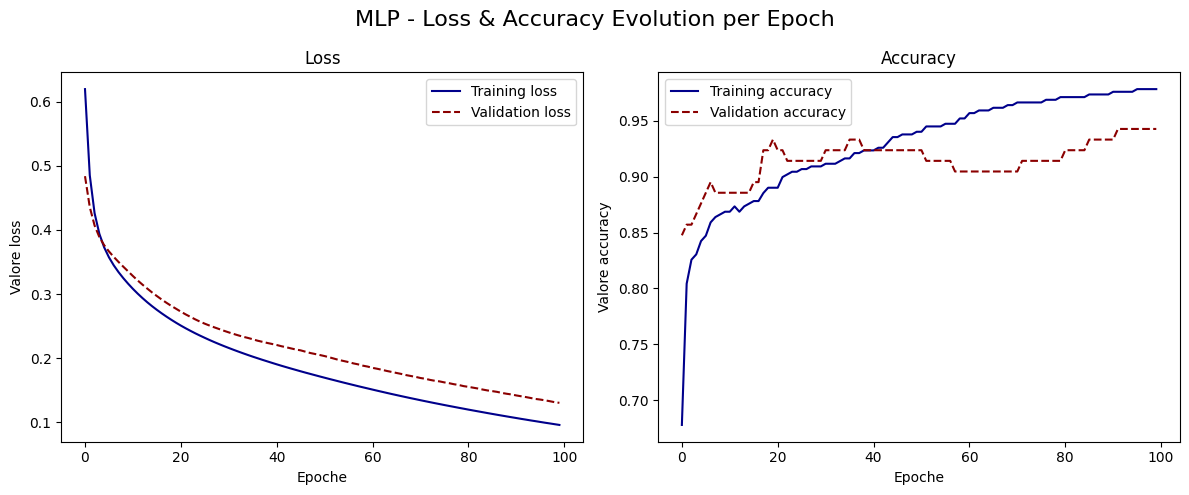

In [58]:
# Visualizzo l'andamento di Loss e Accuracy durante l'addestramento e la validazione del modello nel corso delle epoche
visualization.loss_accuracy_plot(mlp_history)

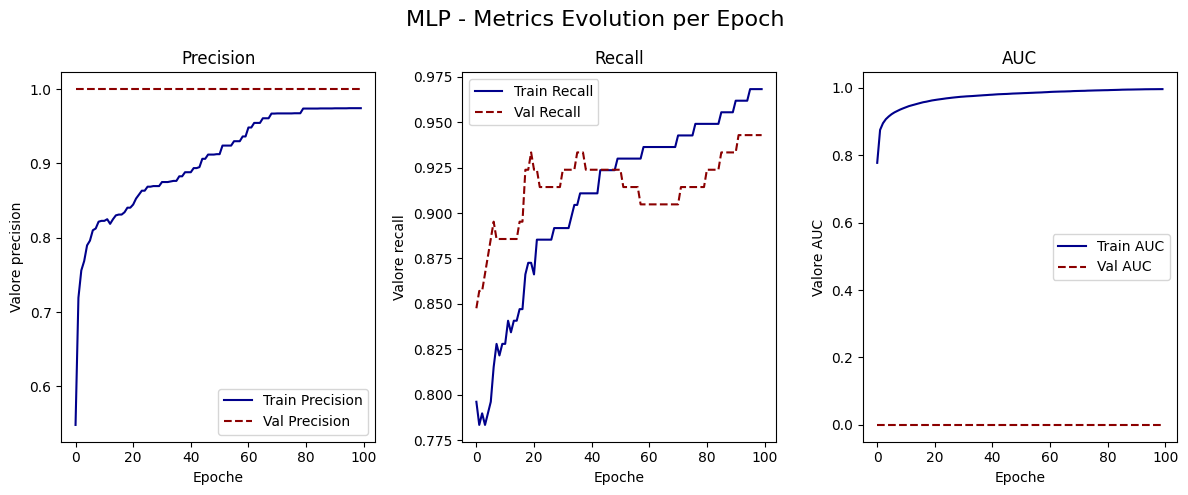

In [59]:
# Visualizzo l'andamento di Precision, Recall e AUC durante l'addestramento e la validazione del modello nel corso delle epoche
visualization.metrics_evolution_plot(mlp_history)

In [ ]:
# Calcolo l'accuracy del modello sui Dati di Test e salvo le previsioni
mlp_y_proba, mlp_y_pred, mlp_test_accuracy = classification_model.ann_accuracy(mlp_model, ann_X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy: 0.7432432432432432


In [61]:
# Calcolo la matrice di confusione
mlp_conf_matrix = confusion_matrix(y_test, mlp_y_pred)

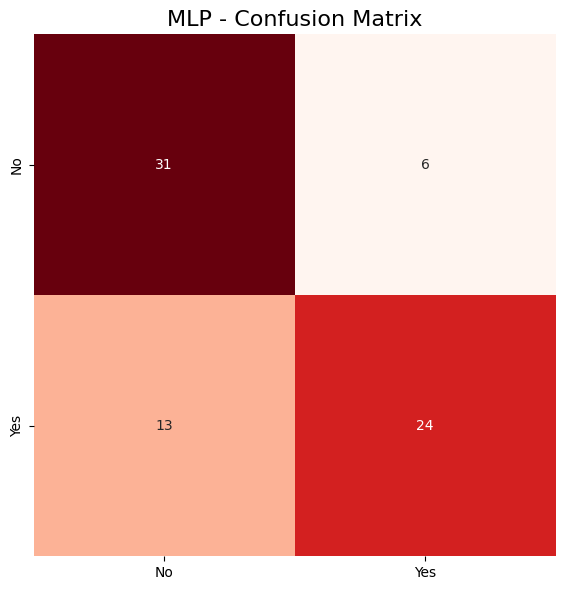

In [62]:
# Visualizzo la nuova matrice di confusione
visualization.confusion_matrix_heatmap('MLP', mlp_conf_matrix)

In [63]:
# Calcolo i coefficienti della Matrice di Confusione per la Rete Neurale
mlp_precision, mlp_recall, mlp_f1, mlp_tn, mlp_fp, mlp_fn, mlp_tp, mlp_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, mlp_y_pred, mlp_conf_matrix)

Precisione: 0.8
Recall: 0.6486486486486487
F1-score: 0.7164179104477612
Specificità: 0.8378378378378378


In [64]:
# Creo un dataframe per le metriche della matrice di confusione
mlp_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(mlp_precision, mlp_recall, mlp_f1, mlp_specificity)

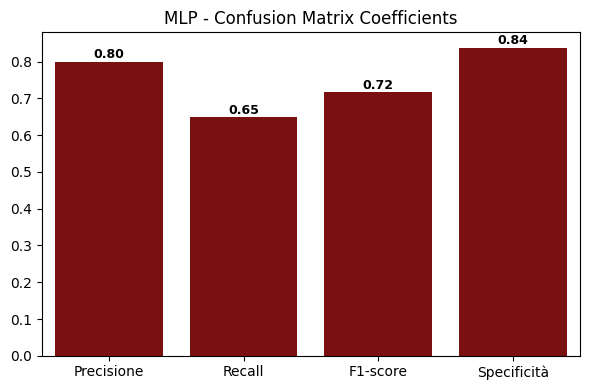

In [65]:
# Visualizzo graficamente con barplot le metriche
visualization.conf_matrix_coefficients_barplot2('MLP', mlp_conf_matrix_coefficients_df)

In [66]:
# Calcolo AUC-ROC e Indice di Gini
mlp_auc, mlp_gini = classification_model.model_auc_roc_gini('MLP', mlp_y_pred, y_test)

MLP - AUC-ROC: 0.7432432432432433
MLP - Indice di Gini: 0.4864864864864866


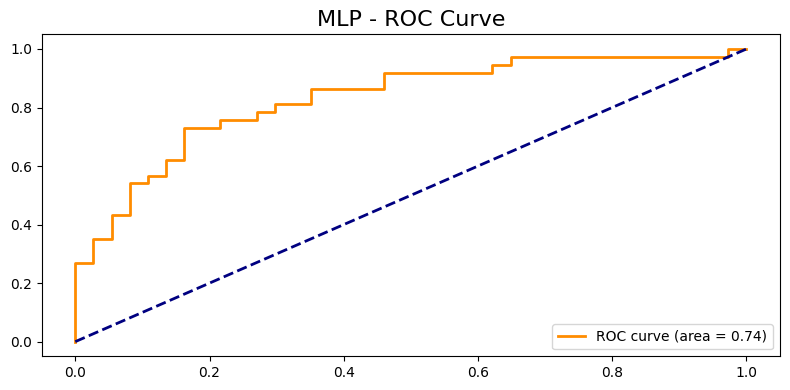

In [67]:
# Visualizzo graficamente la curva ROC
visualization.roc_curve_plot2('MLP', y_test, mlp_y_proba, mlp_auc)

## **XGBOOST**

In [68]:
# Configurazione del modello
xgb_model = classification_model.set_xgb(ann_X_train, y_train_smote)

c:\Users\arvin\Documents\Projects\Company_Bankruptcy_Prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calcolo l'accuracy del modello sui Dati di Test e salvo le previsioni
xgb_y_pred,xgb_y_proba, xgb_test_accuracy = classification_model.model_accuracy(xgb_model, ann_X_train, ann_X_test, y_train_smote, y_test)

c:\Users\arvin\Documents\Projects\Company_Bankruptcy_Prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.8108108108108109


In [70]:
# Calcolo la matrice di confusione
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

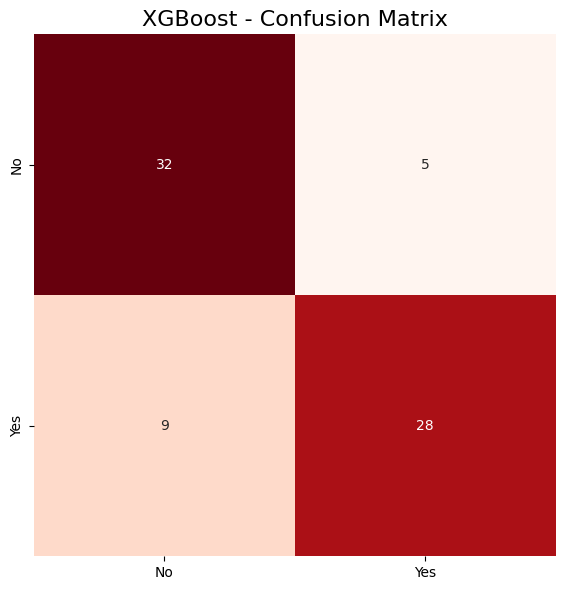

In [71]:
# Visualizzo la matrice di confusione
visualization.confusion_matrix_heatmap('XGBoost', xgb_conf_matrix)

In [72]:
# Calcolo i coefficienti della Matrice di Confusione per il modello XGBoost
xgb_precision, xgb_recall, xgb_f1, xgb_tn, xgb_fp, xgb_fn, xgb_tp, xgb_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, xgb_y_pred, xgb_conf_matrix)

Precisione: 0.8484848484848485
Recall: 0.7567567567567568
F1-score: 0.8
Specificità: 0.8648648648648649


In [73]:
# Creo un dataframe per le metriche della matrice di confusione
xgb_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(xgb_precision, xgb_recall, xgb_f1, xgb_specificity)

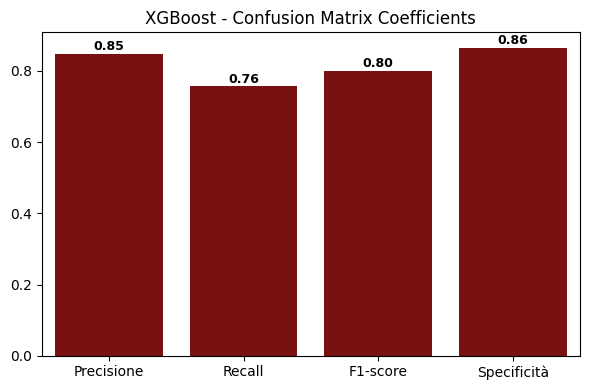

In [74]:
# Visualizzo graficamente con barplot le metriche
visualization.conf_matrix_coefficients_barplot2('XGBoost', xgb_conf_matrix_coefficients_df)

In [75]:
# Calcolo AUC-ROC e Indice di Gini
xgb_auc, xgb_gini = classification_model.model_auc_roc_gini('XGBoost', xgb_y_pred, y_test)

XGBoost - AUC-ROC: 0.8108108108108109
XGBoost - Indice di Gini: 0.6216216216216217


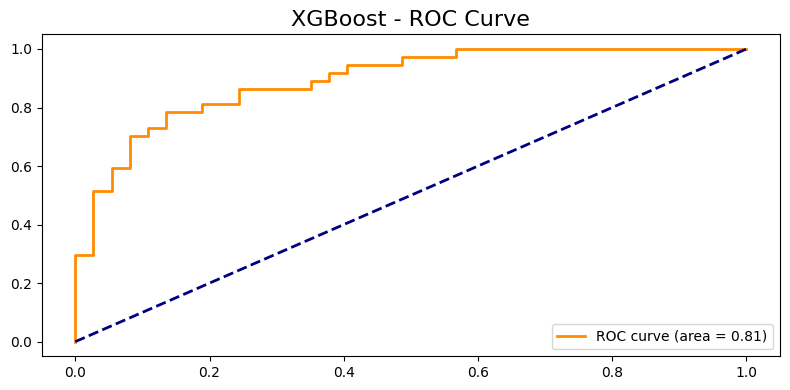

In [76]:
# Visualizzo graficamente la curva ROC
visualization.roc_curve_plot2('XGBoost', y_test, xgb_y_proba, xgb_auc)

### **Ottimizzazione di XGBoost con Ricerca Bayesiana**

In [77]:
# Tuning degli iperparametri
xgb_cv = classification_model.tune_xgb_hyperparameters(xgb_model, ann_X_train, y_train_smote)

Best Parameters: OrderedDict([('colsample_bytree', 0.5294783947758959), ('gamma', 0), ('learning_rate', 0.14782150616653278), ('max_depth', 5), ('n_estimators', 65), ('reg_alpha', 1), ('reg_lambda', 0), ('subsample', 0.5)])
Best Accuracy: 0.8817948717948718


c:\Users\arvin\Documents\Projects\Company_Bankruptcy_Prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calcolo l'accuracy del modello sui Dati di Test e salvo le previsioni
xgb_y_pred2,xgb_y_proba2, xgb_test_accuracy2 = classification_model.model_accuracy(xgb_cv, ann_X_train, ann_X_test, y_train_smote, y_test)

Test Accuracy: 0.8243243243243243


c:\Users\arvin\Documents\Projects\Company_Bankruptcy_Prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [79]:
# Calcolo la nuova matrice di confusione
xgb_conf_matrix2 = confusion_matrix(y_test, xgb_y_pred2)

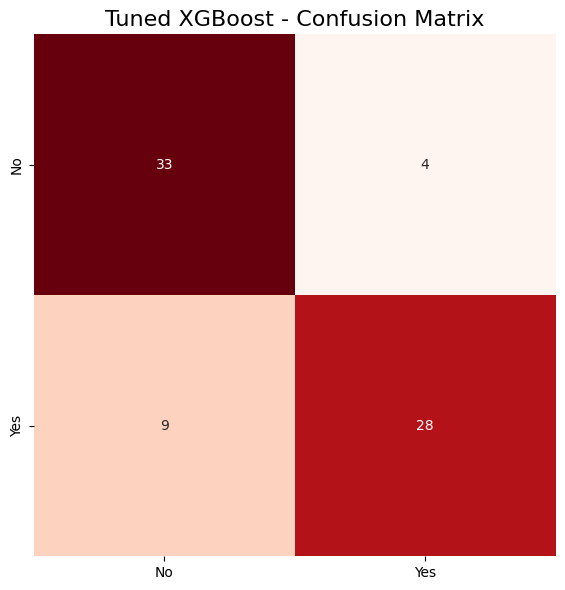

In [80]:
# Visualizzo la nuova matrice di confusione
visualization.confusion_matrix_heatmap('Tuned XGBoost', xgb_conf_matrix2)

In [81]:
# Calcolo nuvoamente i coefficienti della Matrice di Confusione per il modello XGBoost
xgb_precision2, xgb_recall2, xgb_f12, xgb_tn2, xgb_fp2, xgb_fn2, xgb_tp2, xgb_specificity2 = classification_model.conf_matrix_coefficients_analysis(y_test, xgb_y_pred2, xgb_conf_matrix2)

Precisione: 0.875
Recall: 0.7567567567567568
F1-score: 0.8115942028985508
Specificità: 0.8918918918918919


In [82]:
# Creo un dataframe per le metriche della matrice di confusione
xgb_conf_matrix_coefficients_df2 = classification_model.conf_matrix_coefficients_to_df(xgb_precision2, xgb_recall2, xgb_f12, xgb_specificity2)

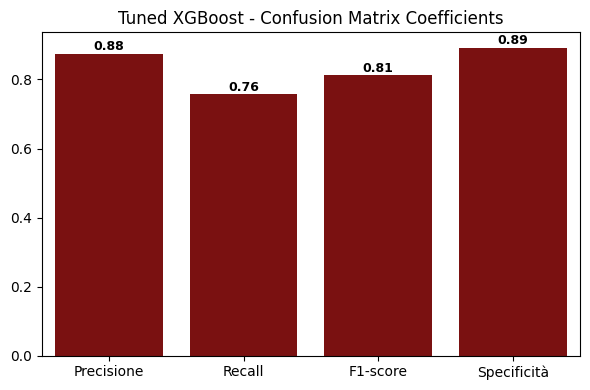

In [83]:
# Visualizzo graficamente con barplot le nuove metriche
visualization.conf_matrix_coefficients_barplot2('Tuned XGBoost', xgb_conf_matrix_coefficients_df2)

In [84]:
# Calcolo nuovamente AUC-ROC e Indice di Gini
xgb_auc2, xgb_gini2 = classification_model.model_auc_roc_gini('Tuned XGBoost', xgb_y_pred2, y_test)

Tuned XGBoost - AUC-ROC: 0.8243243243243243
Tuned XGBoost - Indice di Gini: 0.6486486486486487


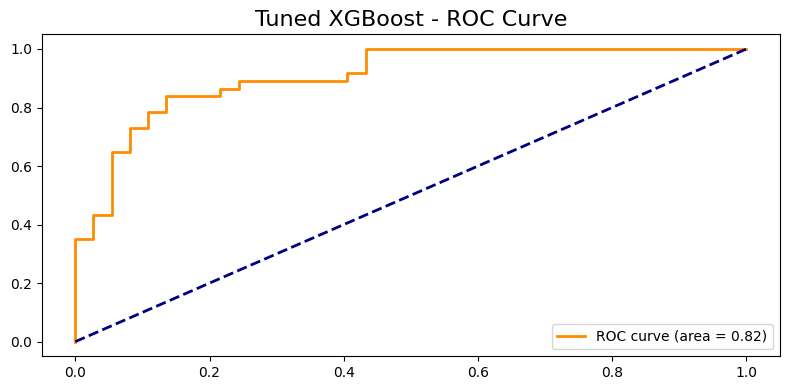

In [85]:
# Visualizzo graficamente la nuova curva ROC
visualization.roc_curve_plot2('Tuned XGBoost', y_test, xgb_y_proba2, xgb_auc2)